In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
class Data:
    def __init__(self):
        self.dataframe = pd.DataFrame([])
        
    def read(self, file_name: str):
        """Reads a CSV file into the dataframe."""
        self.dataframe = pd.read_csv(file_name)
        print(f"Data read from {file_name} successfully.")

    def check_null_values(self):
        """Checks for null values in the dataframe."""
        print("Null Values Before Cleaning:")
        print(self.dataframe.isnull().sum())
        
    def clean_data(self):
        """Removes null values from the dataframe."""
        initial_shape = self.dataframe.shape
        self.dataframe.dropna(inplace=True)
        final_shape = self.dataframe.shape
        print(f"Data cleaned: {initial_shape[0] - final_shape[0]} rows removed.")
        
    def normalize(self):
        """Normalizes numeric columns in the dataframe."""
        numeric_cols = self.dataframe.select_dtypes(include=['float64', 'int64']).columns
        scaler = MinMaxScaler()
        self.dataframe[numeric_cols] = scaler.fit_transform(self.dataframe[numeric_cols])
        print(f"Data normalized for columns: {numeric_cols.tolist()}")
        
    def visualize(self):
        """Plots graph for open stock values vs. date."""
        if 'Date' in self.dataframe.columns and 'Open' in self.dataframe.columns:
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'])
            plt.figure(figsize=(14, 7))
            sns.lineplot(data=self.dataframe, x='Date', y='Open')
            plt.title('Open Stock Values vs. Date')
            plt.xlabel('Date')
            plt.ylabel('Open Stock Value')
            plt.show()
        else:
            print("Dataframe does not contain 'Date' and 'Open' columns.")
    def print_head(self):
        """Prints the head of the dataframe."""
        print("Head of the DataFrame:")
        print(self.dataframe.head())

    def print_description(self):
        """Prints the description of the dataframe."""
        print("\nDescription of the DataFrame:")
        print(self.dataframe.describe())

In [4]:
data = Data()

In [5]:
data.read('D:\Git Hub\LSTMTimeSeriesForecasting\data\TATAMOTORS.NS.csv')


Data read from D:\Git Hub\LSTMTimeSeriesForecasting\data\TATAMOTORS.NS.csv successfully.


In [6]:
data.print_head()
data.print_description()

Head of the DataFrame:
         Date        Open        High         Low       Close   Adj Close  \
0  2019-05-29  179.850006  180.000000  175.350006  176.350006  175.802078   
1  2019-05-30  177.500000  178.500000  173.100006  175.149994  174.605804   
2  2019-05-31  177.800003  177.850006  170.000000  172.600006  172.063736   
3  2019-06-03  170.500000  175.000000  168.399994  174.500000  173.957825   
4  2019-06-04  174.250000  177.199997  172.399994  173.250000  172.711716   

     Volume  
0  15222008  
1  18078726  
2  21488115  
3  21288078  
4  17428731  

Description of the DataFrame:
              Open         High          Low        Close    Adj Close  \
count  1235.000000  1235.000000  1235.000000  1235.000000  1235.000000   
mean    387.462510   392.591337   381.636275   386.880932   386.080660   
std     235.441479   237.197723   232.949905   235.025801   235.038510   
min      66.500000    66.900002    63.500000    65.300003    65.097115   
25%     170.275002   173.0749

In [7]:
data.check_null_values()

Null Values Before Cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
data.clean_data()

Data cleaned: 0 rows removed.


In [9]:
data.normalize()

Data normalized for columns: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [10]:
data.check_null_values()

Null Values Before Cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [11]:
data.print_head()
data.print_description()

Head of the DataFrame:
         Date      Open      High       Low     Close  Adj Close    Volume
0  2019-05-29  0.116675  0.113247  0.115679  0.113160   0.112786  0.031856
1  2019-05-30  0.114256  0.111745  0.113352  0.111938   0.111567  0.039224
2  2019-05-31  0.114565  0.111094  0.110146  0.109339   0.108977  0.048018
3  2019-06-03  0.107051  0.108241  0.108491  0.111275   0.110907  0.047502
4  2019-06-04  0.110911  0.110444  0.112628  0.110002   0.109637  0.037548

Description of the DataFrame:
              Open         High          Low        Close    Adj Close  \
count  1235.000000  1235.000000  1235.000000  1235.000000  1235.000000   
mean      0.330378     0.326115     0.329027     0.327692     0.327016   
std       0.242348     0.237506     0.240924     0.239492     0.239456   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.106819     0.106313     0.106578     0.106129     0.105778   
50%       0.341225     0.340092     0.340625     0.3

c:\Users\rugve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rugve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


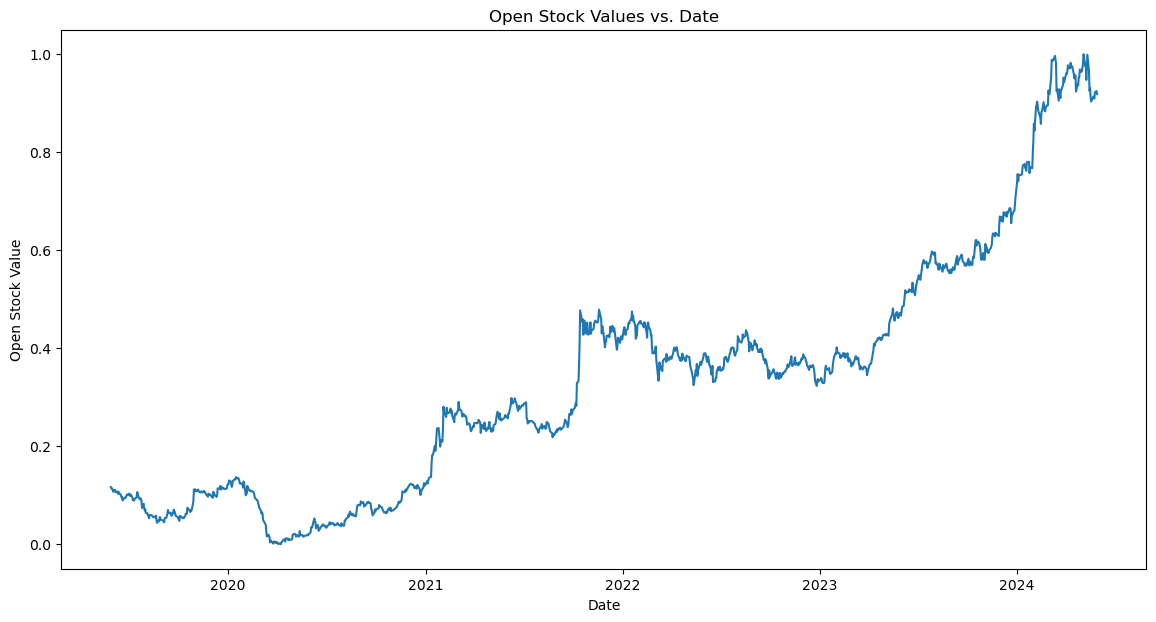

In [12]:
data.visualize()